<a href="https://colab.research.google.com/github/ArunK-ML/ML-DL-Classification-Regression-Model-Apartment-Rental---Dataset/blob/main/Apartment_Rental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
file_path = "/content/apartments_for_rent_classified_100K.csv"

with open(file_path, 'r', encoding='cp1252') as f:
    for i in range(5): # Read the first 5 lines
        line = f.readline()
        print(f"Line {i+1}: {line.strip()}")

Line 1: id;category;title;body;amenities;bathrooms;bedrooms;currency;fee;has_photo;pets_allowed;price;price_display;price_type;square_feet;address;cityname;state;latitude;longitude;source;time
Line 2: 5668640009;housing/rent/apartment;One BR 507 & 509 Esplanade;This unit is located at 507 & 509 Esplanade, Redondo Beach, 90277, CAMonthly rental rates range from $2195We have 1 beds units available for rent;null;1;1;USD;No;Thumbnail;Cats;2195;$2,195;Monthly;542;507  509 Esplanade;Redondo Beach;CA;33.8520;-118.3759;RentLingo;1577360355
Line 3: 5668639818;housing/rent/apartment;Three BR 146 Lochview Drive;This unit is located at 146 Lochview Drive, Newport News, 23602, VAMonthly rental rates range from $1250We have 3 beds units available for rent;null;1.5;3;USD;No;Thumbnail;Cats,Dogs;1250;$1,250;Monthly;1500;146 Lochview Dr;Newport News;VA;37.0867;-76.4941;RentLingo;1577360340
Line 4: 5668639686;housing/rent/apartment;Three BR 3101 Morningside Drive;This unit is located at 3101 Morningside 

In [15]:
import pandas as pd

# ==============================
# 1. Load the CSV
# ==============================

file_path = "/content/apartments_for_rent_classified_100K.csv"

# The file is semicolon-separated
df = pd.read_csv(file_path, sep=';', encoding="cp1252", low_memory=False, quotechar='"')


# ==============================
# 2. Clean & Align Columns
# ==============================

# Strip extra spaces in column names
df.columns = df.columns.str.strip()

# Reset index - This might not be necessary after fixing the delimiter,
# but keep it for now if the original data had an index column.
df = df.reset_index(drop=True)

# ==============================
# 3. Save back to CSV
# ==============================
output_path = "apartments_for_rent_clean.csv"
df.to_csv(output_path, index=False)

print(f"Clean CSV saved as: {output_path}")

Clean CSV saved as: apartments_for_rent_clean.csv


In [3]:
import pandas as pd

df = pd.read_csv("/content/apartments_for_rent_clean.csv")

/tmp/ipython-input-2702983498.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/apartments_for_rent_clean.csv")


In [4]:
df.shape

(99492, 22)

In [5]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [6]:
# import pandas as pd

# # Example: create price categories
# bins = [0, 1000, 2000, 3000, 5000, 10000]
# labels = ["Very Low", "Low", "Medium", "High", "Luxury"]

# df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels)

# print(df[["price", "price_category"]].head())


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [9]:
df.isna().sum()

,0
id,0
category,0
title,0
body,0
amenities,16044
bathrooms,63
bedrooms,124
currency,0
fee,0
has_photo,0


In [10]:
df.duplicated().sum()

np.int64(84)

# **Data Cleaning & Preprocessing**

# **Handle Null values**

In [26]:
df.isna().sum()

,0
id,0
category,0
title,0
body,0
amenities,0
bathrooms,0
bedrooms,0
currency,0
fee,0
has_photo,0


**DataType Change**

In [16]:
df = df.dropna(subset=["latitude", "longitude","price"])

In [ ]:
# from geopy.geocoders import Nominatim

# # Initialize geocoder
# geolocator = Nominatim(user_agent="geoapiExercises")


# # Function to get address
# def get_address(lat, lon):
#     try:
#         location = geolocator.reverse((lat, lon), exactly_one=True)
#         return location.address if location else "Address not found"
#     except:
#         return "Error fetching address"

# # Apply function and create new column
# df["Address_Find"] = df.apply(lambda row: get_address(row["latitude"], row["longitude"]), axis=1)



In [18]:
df["pets_allowed"] = df["pets_allowed"].fillna("Allowed & Not Allowed")

df["amenities"] = df["amenities"].fillna("No Amenities")

In [21]:
# KNN Imputer

import numpy as np
from sklearn.impute import KNNImputer


# Select only the columns you want to use for imputation
# ---- STEP 1: Select only target + helper columns ----
cols_for_impute = ["bathrooms","bedrooms"]

# ---- STEP 2: Apply KNN imputer only on these columns ----
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df[cols_for_impute])

# ---- STEP 3: Put back only the Age column (target) ----
df["bathrooms"] = imputed[:, 0]   # 0th column corresponds to bathrooms
df["bedrooms"] = imputed[:, 1]   # 1st column corresponds to bedrooms

print("\nImputer Complete")


Imputer Complete


In [25]:
# Fill missing address using city + state
df["address"] = df["address"].fillna(
    df["cityname"].astype(str) + ", " + df["state"].astype(str)
)

print("\nAddress Null Value Handle Complete")


Address Null Value Handle Complete


In [27]:
df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",No Amenities,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,2195.0,542.0,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",No Amenities,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,1250.0,1500.0,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,No Amenities,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,1395.0,1650.0,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",No Amenities,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,1600.0,820.0,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",No Amenities,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,975.0,624.0,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,$780,Monthly,605,"780.0, 605.0",780.0,605.0,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,$813,Monthly,921,"813.0, 921.0",813.0,921.0,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,"$1,325",Monthly,650,"1325.0, 650.0",1325.0,650.0,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,$931,Monthly,701,"931.0, 701.0",931.0,701.0,35.4158,-80.8451,RentDigs.com,1544185670


In [30]:
df.duplicated().sum()

np.int64(0)

In [29]:
df.drop_duplicates(inplace=True)

# **Feature Engineering & Selection**

In [31]:

# transformations
df["price_per_sqft"] = df["price"] / df["square_feet"]
df["room_count"] = df["bedrooms"] + df["bathrooms"]
df["log_price"] = np.log1p(df["price"])
df["avg_room_size"] = df["square_feet"] / (df["room_count"].replace(0, np.nan))

#Use latitude & longitude to cluster apartments into neighborhoods.

from sklearn.cluster import KMeans
df["location_cluster"] = KMeans(n_clusters=10, random_state=42).fit_predict(df[["latitude","longitude"]])


In [32]:
# create price categories
bins = [0, 1000, 2000, 3000, 5000, 10000]
labels = ["Very Low", "Low", "Medium", "High", "Luxury"]

df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels)

print(df[["price", "price_category"]].head())

median_price = df["price"].median()
df["affordability"] = df["price"].apply(lambda x: "Affordable" if x <= median_price else "Expensive")


    price price_category
0  2195.0         Medium
1  1250.0            Low
2  1395.0            Low
3  1600.0            Low
4   975.0       Very Low


In [34]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,longitude,source,time,price_per_sqft,room_count,log_price,avg_room_size,location_cluster,price_category,affordability
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",No Amenities,1.0,1.0,USD,No,Thumbnail,...,-118.3759,RentLingo,1577360355,4.049815,2.0,7.694393,271.000000,6,Medium,Expensive
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",No Amenities,1.5,3.0,USD,No,Thumbnail,...,-76.4941,RentLingo,1577360340,0.833333,4.5,7.131699,333.333333,3,Low,Affordable
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,No Amenities,2.0,3.0,USD,No,Thumbnail,...,-78.6438,RentLingo,1577360332,0.845455,5.0,7.241366,330.000000,3,Low,Expensive
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",No Amenities,1.0,2.0,USD,No,Thumbnail,...,-121.9712,RentLingo,1577360330,1.951220,3.0,7.378384,273.333333,0,Low,Expensive
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",No Amenities,1.0,1.0,USD,No,Thumbnail,...,-106.6110,RentLingo,1577360308,1.562500,2.0,6.883463,312.000000,4,Very Low,Affordable


In [35]:
df.dtypes

,0
id,int64
category,object
title,object
body,object
amenities,object
bathrooms,float64
bedrooms,float64
currency,object
fee,object
has_photo,object


In [37]:
df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time', 'price_per_sqft',
       'room_count', 'log_price', 'avg_room_size', 'location_cluster',
       'price_category', 'affordability'],
      dtype='object')

In [39]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,longitude,source,time,price_per_sqft,room_count,log_price,avg_room_size,location_cluster,price_category,affordability
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",No Amenities,1.0,1.0,USD,No,Thumbnail,...,-118.3759,RentLingo,1577360355,4.049815,2.0,7.694393,271.000000,6,Medium,Expensive
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",No Amenities,1.5,3.0,USD,No,Thumbnail,...,-76.4941,RentLingo,1577360340,0.833333,4.5,7.131699,333.333333,3,Low,Affordable
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,No Amenities,2.0,3.0,USD,No,Thumbnail,...,-78.6438,RentLingo,1577360332,0.845455,5.0,7.241366,330.000000,3,Low,Expensive
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",No Amenities,1.0,2.0,USD,No,Thumbnail,...,-121.9712,RentLingo,1577360330,1.951220,3.0,7.378384,273.333333,0,Low,Expensive
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",No Amenities,1.0,1.0,USD,No,Thumbnail,...,-106.6110,RentLingo,1577360308,1.562500,2.0,6.883463,312.000000,4,Very Low,Affordable


In [43]:
# list of columns you want to copy
cols_to_copy = ['amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
        'price_type', 'square_feet', 'time', 'price_per_sqft',
       'room_count', 'log_price', 'avg_room_size', 'location_cluster',
       'price_category', 'affordability']

# make a copy into new DataFrame
df_selected = df[cols_to_copy].copy()

In [44]:
df_selected.head()

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,time,price_per_sqft,room_count,log_price,avg_room_size,location_cluster,price_category,affordability
0,No Amenities,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,Monthly,542,1577360355,4.049815,2.0,7.694393,271.000000,6,Medium,Expensive
1,No Amenities,1.5,3.0,USD,No,Thumbnail,"Cats,Dogs",1250.0,Monthly,1500,1577360340,0.833333,4.5,7.131699,333.333333,3,Low,Affordable
2,No Amenities,2.0,3.0,USD,No,Thumbnail,Allowed & Not Allowed,1395.0,Monthly,1650,1577360332,0.845455,5.0,7.241366,330.000000,3,Low,Expensive
3,No Amenities,1.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1600.0,Monthly,820,1577360330,1.951220,3.0,7.378384,273.333333,0,Low,Expensive
4,No Amenities,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",975.0,Monthly,624,1577360308,1.562500,2.0,6.883463,312.000000,4,Very Low,Affordable


In [45]:
df_selected.dtypes

,0
amenities,object
bathrooms,float64
bedrooms,float64
currency,object
fee,object
has_photo,object
pets_allowed,object
price,float64
price_type,object
square_feet,int64


In [46]:
# -----------------------------
# Encode Categorical columns
# -----------------------------
#  Label Encoding (if order matters or for tree models)
from sklearn.preprocessing import LabelEncoder

cat_cols = df_selected.select_dtypes(include=['category',"object"]).columns
le = LabelEncoder()
for col in cat_cols:
    df_selected[col] = le.fit_transform(df_selected[col])

In [48]:
df_selected.head()

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,time,price_per_sqft,room_count,log_price,avg_room_size,location_cluster,price_category,affordability
0,9521,1.0,1.0,0,0,1,1,2195.0,0,542,1577360355,4.049815,2.0,7.694393,271.000000,6,3,1
1,9521,1.5,3.0,0,0,1,2,1250.0,0,1500,1577360340,0.833333,4.5,7.131699,333.333333,3,1,0
2,9521,2.0,3.0,0,0,1,0,1395.0,0,1650,1577360332,0.845455,5.0,7.241366,330.000000,3,1,1
3,9521,1.0,2.0,0,0,1,2,1600.0,0,820,1577360330,1.951220,3.0,7.378384,273.333333,0,1,1
4,9521,1.0,1.0,0,0,1,2,975.0,0,624,1577360308,1.562500,2.0,6.883463,312.000000,4,4,0


In [49]:
df_selected.describe()

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,time,price_per_sqft,room_count,log_price,avg_room_size,location_cluster,price_category,affordability
count,99382.000000,99382.000000,99382.000000,99382.0,99382.000000,99382.000000,99382.000000,99382.000000,99382.000000,99382.000000,9.938200e+04,99382.000000,99382.000000,99382.000000,99382.000000,99382.000000,99382.000000,99382.000000
mean,7460.053058,1.445242,1.727399,0.0,0.002022,1.469964,0.769385,1527.163792,0.000070,956.478064,1.559664e+09,1.685936,3.172640,7.226769,314.432893,4.255680,1.969723,0.498632
std,2859.211618,0.547295,0.749634,0.0,0.044927,0.658897,0.968806,904.444467,0.011437,417.696001,1.105181e+07,0.858566,1.191282,0.438967,109.321446,2.328124,1.359204,0.500001
min,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,100.000000,0.000000,101.000000,1.544174e+09,0.047083,1.000000,4.615121,46.400000,0.000000,0.000000,0.000000
25%,6176.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,1014.000000,0.000000,729.000000,1.550832e+09,1.120229,2.000000,6.922644,262.500000,2.000000,1.000000,0.000000
50%,9162.000000,1.000000,2.000000,0.0,0.000000,2.000000,0.000000,1350.000000,0.000000,900.000000,1.568745e+09,1.470238,3.000000,7.208600,300.000000,4.000000,1.000000,0.000000
75%,9521.000000,2.000000,2.000000,0.0,0.000000,2.000000,2.000000,1795.000000,0.000000,1115.000000,1.568767e+09,2.001445,4.000000,7.493317,361.500000,6.000000,3.000000,1.000000
max,9823.000000,9.000000,9.000000,0.0,1.000000,2.000000,4.000000,52500.000000,2.000000,50000.000000,1.577391e+09,37.023977,15.000000,10.868587,12000.000000,9.000000,5.000000,1.000000


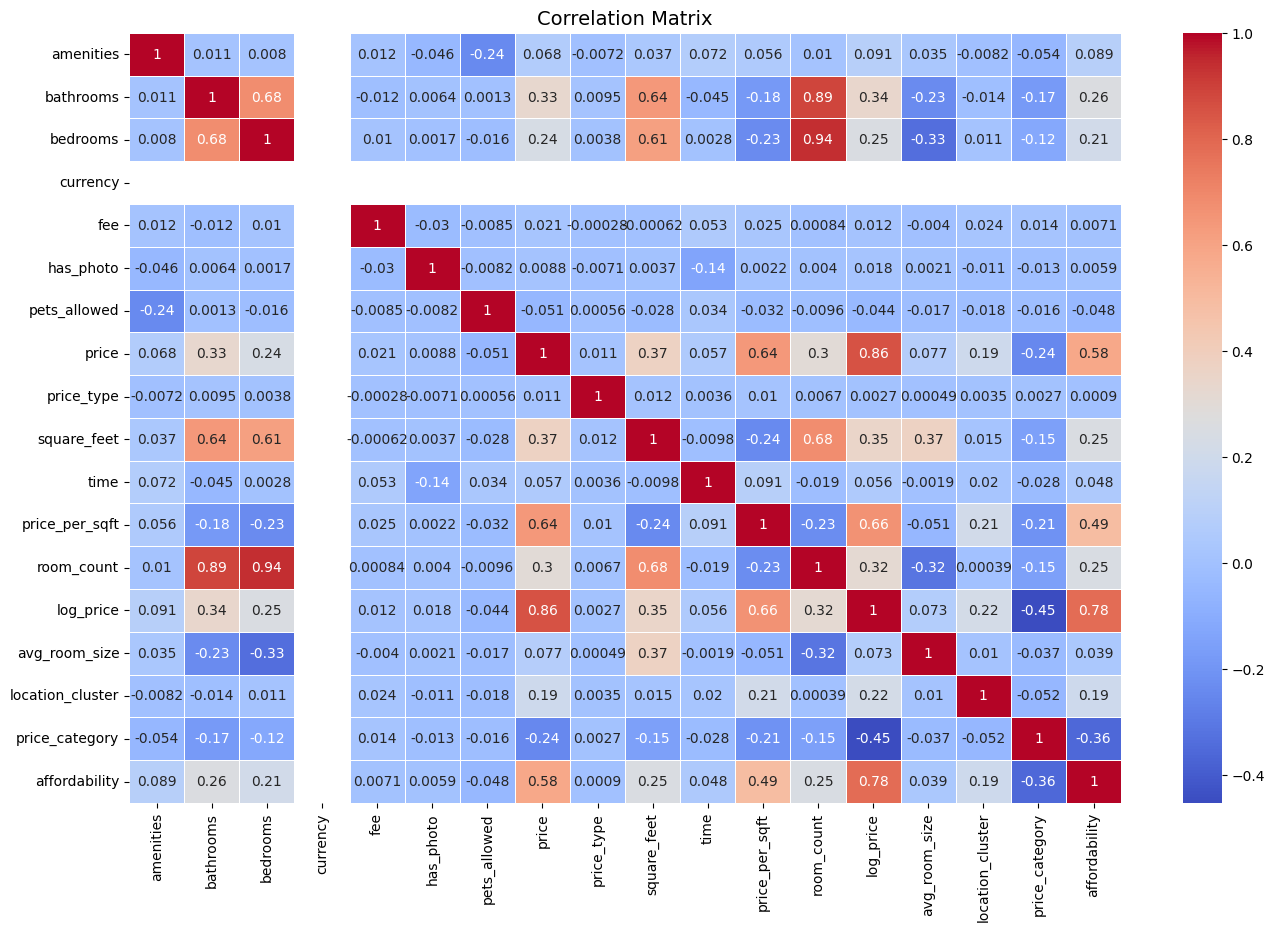

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

# **Check Distribution**

In [54]:
df_selected.columns

Index(['amenities', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo',
       'pets_allowed', 'price', 'price_type', 'square_feet', 'time',
       'price_per_sqft', 'room_count', 'log_price', 'avg_room_size',
       'location_cluster', 'price_category', 'affordability'],
      dtype='object')

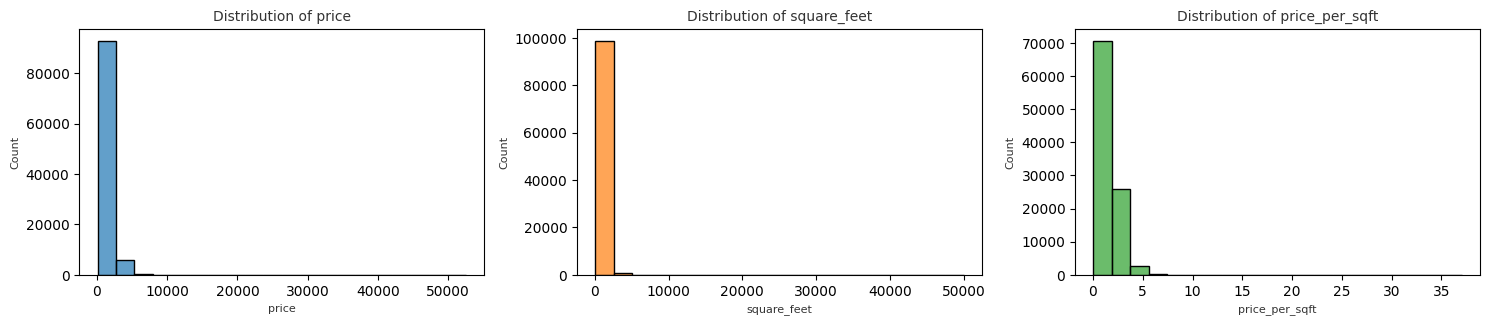

In [59]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Blue, Orange, Green, Red, Purple, Brown

plt.figure(figsize=(15, 18)) # size figure

# loop over each column to draw
numerical_cols = ['price','square_feet','price_per_sqft']
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)  # (row, col, #plot) - Changed to 6 rows and 3 columns to accommodate all numerical columns
    sns.histplot(df_selected[col], bins=20, color=colors[i % len(colors)], alpha=0.7) # histogram
    plt.title(f'Distribution of {col}', fontsize=10, color='#333333')
    plt.xlabel(col, fontsize=8, color='#333333')
    plt.ylabel('Count', fontsize=8, color='#333333')

plt.tight_layout()
plt.show()


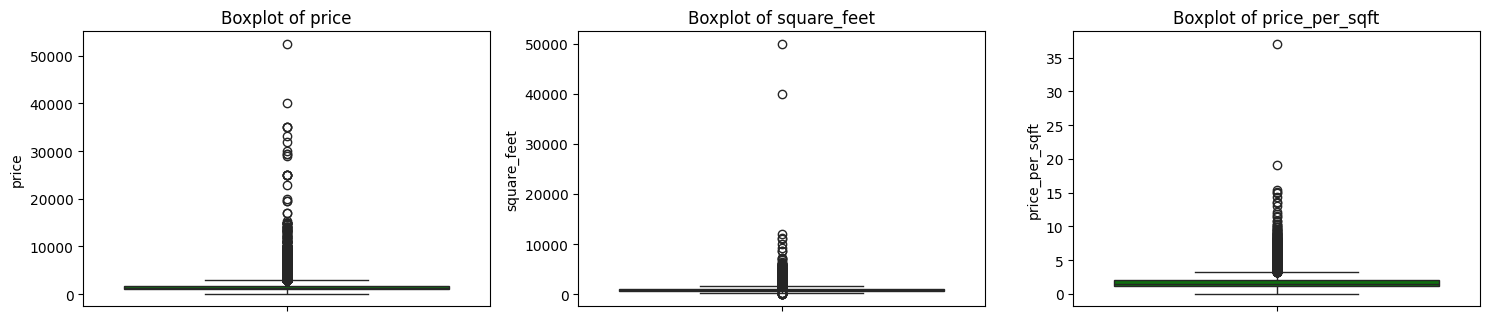

In [58]:
# Outliers

plt.figure(figsize=(15, 18)) # size figure
# loop over each columns
numerical_cols = ['price','square_feet','price_per_sqft']
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)
    sns.boxplot(df_selected[col], color='green')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [63]:
#  Show all unique values column-wise
for col in numerical_cols:
    print(f"\n--- {col} ---")
    print(df_selected[col].value_counts())

Streaming output truncated to the last 5000 lines.
0.651408       1
0.855663       1
1.071344       1
1.014815       1
1.059032       1
1.313163       1
1.319506       1
2.504801       1
1.510833       1
2.852386       1
3.023629       1
3.178914       1
1.550604       1
0.880392       1
1.283086       1
1.708547       1
2.748656       1
2.590432       1
0.928767       1
0.735088       1
0.940141       1
2.106173       1
2.871601       1
2.328680       1
2.252778       1
1.880674       1
0.861979       1
2.228114       1
0.710407       1
2.063694       1
2.650815       1
2.306604       1
3.029283       1
1.296741       1
1.849645       1
1.893010       1
2.066742       1
2.389724       1
2.477294       1
2.555249       1
1.076019       1
1.406699       1
2.968370       1
1.065272       1
1.334601       1
3.439636       1
2.416364       1
2.438532       1
2.096466       1
2.528773       1
3.798611       1
2.142496       1
1.239394       1
1.520651       1
2.336387       1
3.136483      